# Week 4 - AlexNet

Author: Khushee Kapoor

Last Updated: 19/8/22

To start, we first degrade the version of Tensorflow so as to utilize GPU for optimizing training.

In [ ]:
# degrading the tensorflow version
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Next, we import the following libraries:

- NumPy: for data manipulation
- Pandas: for data manipulation
- Matplotlib: for data visualization
- Seaborn: for data visualization
- Tensorflow: to build neural networks
- OS: for manipulating the data directories
- Zipfile: for data importing
- shutil: for manipulating the data directories
- PIL: to deal with images

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os
import zipfile
import shutil
from PIL import Image

After that, we implement AlexNet for image classification on the Cats-and-Dogs and the Horse2Zebra Datasets.

## Cats-and-Dogs Dataset

To start, we first import the dataset from the link provided.

In [4]:
# importing the dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-19 05:11:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   116MB/s    in 0.6s    

2022-08-19 05:11:26 (116 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Next, we unzip the dataset and store it in the required directory.

In [5]:
# unzipping the dataset and storing in appropriate dataset
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

After that, we use the ImageDataGenerator to generate the training, testing, and validation datasets and normalize the images.

In [6]:
# creating pipelines to generate and normalize the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Next, we split make directories and split the training and validation sets accordingly. To do this, we use functions from the os library.

In [7]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

To get a glimpse of the dataset, we print out one of the images using functions from the matplotlib library.

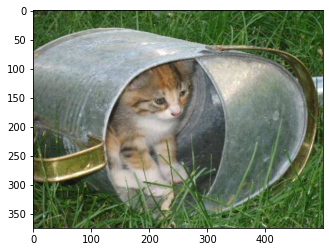

In [9]:
# printing out one image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

Now, since we don't really have a testing set, we create a testing set and move the first 100 images from the validation set to the testing set using functions from the os library.

In [10]:
# creating a test directory
test_dir = os.path.join(base_dir, 'test')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dir) 
os.mkdir(os.path.join(test_dir, 'cats'))
os.mkdir(os.path.join(test_dir, 'dogs'))

# obtaining the image names in the validation directory
validation_dog_fnames = os.listdir(validation_dogs_dir)
validation_cat_fnames = os.listdir(validation_cats_dir)

# moving the first 100 images to the corresponding test data folder
for i in range(100):
  shutil.move(os.path.join(validation_dogs_dir,validation_dog_fnames[i]),test_dogs_dir)
  shutil.move(os.path.join(validation_cats_dir,validation_cat_fnames[i]),test_cats_dir)

Next, we implement the previously created data generators to generate the train, test, and validation sets and resize the images to 227x227 for the network implementation.

In [11]:
# flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(227, 227), # resclaing the images to 227 x 227
        batch_size=20,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [12]:
# flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227), # resclaing the images to 227 x 227
        batch_size=20,
        class_mode='categorical')

Found 800 images belonging to 2 classes.


In [13]:
# flow test images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(227, 227), # resclaing the images to 227 x 227
        batch_size=20,
        class_mode='categorical')

Found 200 images belonging to 2 classes.


Now, we implement the AlexNet architecture.

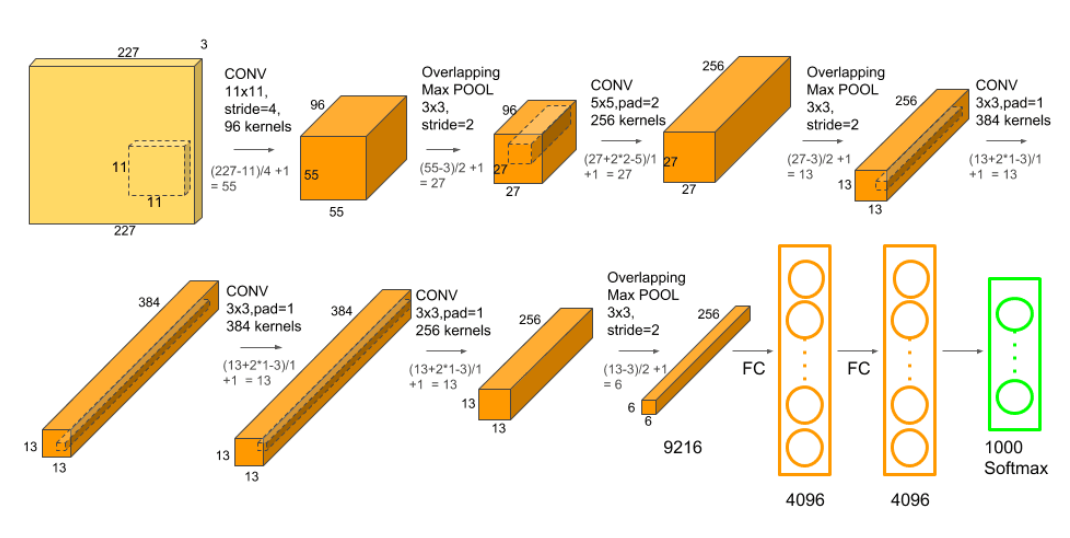

In [14]:
# creating a neural network to implement the AlexNet architecture
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])

Next, we compile the model and set the optimizer to be 'adam' with learning rate to be 0.0001, loss to be 'categorical_crossentropy' and metric to be 'accuracy'. After that, we train the model on the training data generator with number of epochs set to 10 (optimum value set after trial and error of various combinations of accuracy and loss) and validation data to be used from the validation data generator.

In [15]:
# compiling the network
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

In [16]:
# training the network
history = model.fit( train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 21s 153ms/step - loss: 2.4474 - acc: 0.5585 - val_loss: 2.3963 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 10s 99ms/step - loss: 1.8406 - acc: 0.5875 - val_loss: 1.4778 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 10s 101ms/step - loss: 1.2286 - acc: 0.5910 - val_loss: 0.7342 - val_acc: 0.5562
Epoch 4/10
100/100 [==============================] - 10s 100ms/step - loss: 1.1248 - acc: 0.6100 - val_loss: 1.4627 - val_acc: 0.5075
Epoch 5/10
100/100 [==============================] - 11s 107ms/step - loss: 0.8869 - acc: 0.6385 - val_loss: 0.6815 - val_acc: 0.6400
Epoch 6/10
100/100 [==============================] - 10s 98ms/step - loss: 0.7965 - acc: 0.6635 - val_loss: 0.7858 - val_acc: 0.5813
Epoch 7/10
100/100 [==============================] - 10s 104ms/step - loss: 0.7232 - acc: 0.6995 - val_loss: 1.9430 - val_acc: 0.5512
Epoch 8/10
100/100 [==============================] - 10s

We then compare the training and validation accuracies. To do this, we use the history attribute and extract the accuracies of the models. Next, we plot it against the number of epochs using functions from the MatPlotLib library.

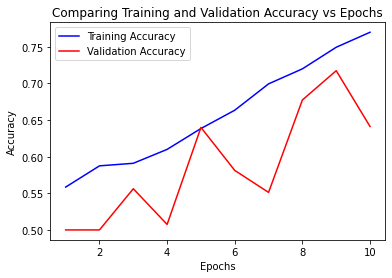

In [17]:
# extracting the model accuracy against epochs
ta = history.history['acc']
va = history.history['val_acc']
epochs = range(1,11)

# plotting the accuracies
plt.figure()
plt.plot(epochs, ta, 'b', label='Training Accuracy')
plt.plot(epochs, va, 'r', label='Validation Accuracy')
plt.title('Comparing Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

As we can see, the training and validation accuracies have an upward trend as the number of epochs increase, however, the validation accuracy fluctuates a lot. There is some difference between the training and validation accuracies.

Next, we compare the training and validation losses. To do this, we use the history attribute and extract the losses of the models. Next, we plot it against the number of epochs using functions from the MatPlotLib library.

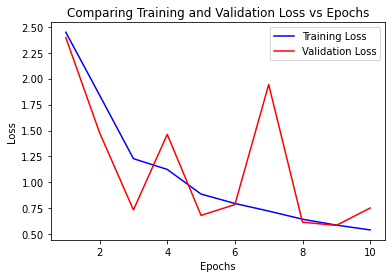

In [18]:
# extracting the model loss against epochs
tl = history.history['loss']
vl = history.history['val_loss']
epochs = range(1,11)

# plotting the losses
plt.figure()
plt.plot(epochs, tl, 'b', label='Training Loss')
plt.plot(epochs, vl, 'r', label='Validation Loss')
plt.title('Comparing Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

As we can see, the training and validation loss donot have much difference between them and both have a downward trend. However, the validation loss fluctuates a lot.

To evaluate the performance of the model on the test set, we use the evaluate() function and print the model's accuracy on the testing set.

In [19]:
# evaluating the model on the testing set
print(str.format('Accuracy on Test Set: {:.2f}%', model.evaluate(test_generator)[1]*100))

10/10 [==============================] - 1s 69ms/step - loss: 0.8888 - acc: 0.6400
Accuracy on Test Set: 64.00%


As we can see, the network has an accuracy of 64.00% on the testing set, indicating that the model performs moderately.

## Horse2Zebra Dataset

To start, we first import the dataset from the link provided.

In [20]:
# importing the data
if not os.path.exists('./horse2zebra'):
  import gdown
  url = 'https://drive.google.com/uc?id=1jPelB2jzNZJq3ZU9Uk_Mkt4MJtF3DRgg'
  gdown.download(url, './horse2zebra.zip', quiet=False)
  !unzip ./horse2zebra.zip > /dev/null

Downloading...
From: https://drive.google.com/uc?id=1jPelB2jzNZJq3ZU9Uk_Mkt4MJtF3DRgg
To: /content/horse2zebra.zip
100%|██████████| 117M/117M [00:02<00:00, 47.3MB/s]


After that, we sort out the images and create training and testing directories to store the images.

In [21]:
# extracting the training images
for root, dirs, files in os.walk('./horse2zebra'):
    if root.endswith('/train/A'):
        filenames_horses=files
    if root.endswith('/train/B'):
        filenames_zebras=files

# sorting the filenames
filenames_horses_sort=sorted(filenames_horses)
filenames_zebras_sort=sorted(filenames_zebras)

horses_root='./horse2zebra/train/A'
zebras_root='./horse2zebra/train/B'

horses_train=[]
zebras_train=[]

# saving all the images in the appropriate directories
for i in range(len(filenames_horses_sort)):
          horses_train.append(Image.open(os.path.join(horses_root, filenames_horses_sort[i])).convert('RGB'))

for i in range(len(filenames_zebras_sort)):
          zebras_train.append(Image.open(os.path.join(zebras_root, filenames_zebras_sort[i])).convert('RGB'))

train_dir = './horse2zebra/train'

In [22]:
# extracting the testing images
for root, dirs, files in os.walk('./horse2zebra'):
    if root.endswith('/test/A'):
        filenames_horses=files
    if root.endswith('/test/B'):
        filenames_zebras=files

# sorting the filenames
filenames_horses_sort=sorted(filenames_horses)
filenames_zebras_sort=sorted(filenames_zebras)

horses_root='./horse2zebra/test/A'
zebras_root='./horse2zebra/test/B'

horses_test=[]
zebras_test=[]

# saving all the images in the appropriate directories
for i in range(len(filenames_horses_sort)):
          horses_test.append(Image.open(os.path.join(horses_root, filenames_horses_sort[i])).convert('RGB'))

for i in range(len(filenames_zebras_sort)):
          zebras_test.append(Image.open(os.path.join(zebras_root, filenames_zebras_sort[i])).convert('RGB'))

test_dir = './horse2zebra/test'

To get a glimpse of the dataset, we print out one of the images using functions from the matplotlib library.

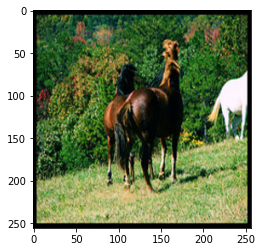

In [23]:
# printing out one image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(os.path.join(horses_root, filenames_horses_sort[0])))

After that, we use the ImageDataGenerator to generate the training, testing, and validation datasets and normalize the images.

In [24]:
# creating pipelines to generate and normalize the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

Now, since we don't really have a validation set, we create a validation set and move the first 100 images from the training set to the validation set using functions from the os library.

In [25]:
# creating a validation directory
val_dir = os.path.join('./horse2zebra', 'val')
val_horse_dir = os.path.join(val_dir, 'A')
val_zebra_dir = os.path.join(val_dir, 'B')
os.mkdir(val_dir) 
os.mkdir(os.path.join(val_dir, 'A'))
os.mkdir(os.path.join(val_dir, 'B'))

# obtaining the image names in the training directory
train_horse_dir = os.path.join(train_dir, 'A')
train_horse_fnames = os.listdir(train_horse_dir)
train_zebra_dir = os.path.join(train_dir, 'B')
train_zebra_fnames = os.listdir(train_zebra_dir)

# moving the first 100 images to the corresponding validation data folder
for i in range(100): 
  shutil.move(os.path.join(train_horse_dir,train_horse_fnames[i]),val_horse_dir)
  shutil.move(os.path.join(train_zebra_dir,train_zebra_fnames[i]),val_zebra_dir)

Next, we implement the previously created data generators to generate the train, test, and validation sets and resize the images to 227x227 for the network implementation.

In [26]:
# flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(227, 227), # rescaling the images to 227x227
        batch_size=20,
        class_mode='categorical')

Found 2201 images belonging to 2 classes.


In [27]:
# flow validaiton images in batches of 20 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(227, 227), # rescaling the images to 227x227
    batch_size=20,
    class_mode='categorical'
)

Found 200 images belonging to 2 classes.


In [28]:
# flow test images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(227, 227), # rescaling the images to 227x227
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


Next, we implement the AlexNet architecture.

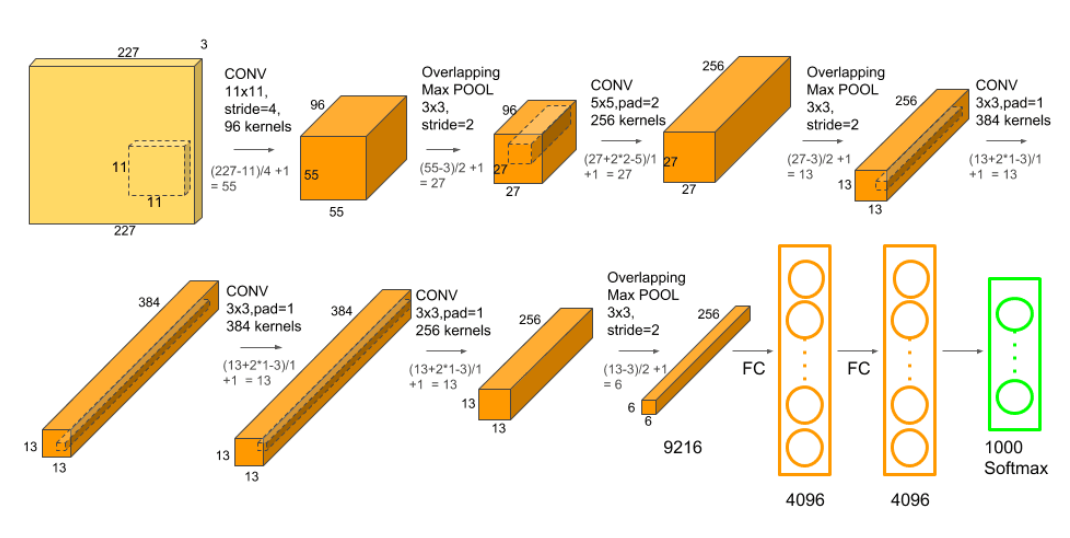

In [29]:
# creating a neural network to implement the AlexNet architecture
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])

Next, we compile the model and set the optimizer to be 'adam' with learning rate to be 0.0001, loss to be 'categorical_crossentropy' and metric to be 'accuracy'. After that, we train the model on the training data generator with number of epochs set to 10 (optimum value set after trial and error of various combinations of accuracy and loss) and validation data to be used from the validation data generator.

In [30]:
# compiling the network
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

In [31]:
# training the network
history = model.fit( train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
111/111 [==============================] - 9s 71ms/step - loss: 1.4842 - acc: 0.7460 - val_loss: 1.1148 - val_acc: 0.5000
Epoch 2/10
111/111 [==============================] - 7s 66ms/step - loss: 0.8702 - acc: 0.8255 - val_loss: 2.2448 - val_acc: 0.5000
Epoch 3/10
111/111 [==============================] - 7s 66ms/step - loss: 0.5850 - acc: 0.8601 - val_loss: 0.8100 - val_acc: 0.6300
Epoch 4/10
111/111 [==============================] - 7s 66ms/step - loss: 0.4313 - acc: 0.8882 - val_loss: 1.6565 - val_acc: 0.5850
Epoch 5/10
111/111 [==============================] - 7s 66ms/step - loss: 0.3676 - acc: 0.8932 - val_loss: 0.5357 - val_acc: 0.7950
Epoch 6/10
111/111 [==============================] - 7s 67ms/step - loss: 0.3074 - acc: 0.8987 - val_loss: 0.3794 - val_acc: 0.8900
Epoch 7/10
111/111 [==============================] - 7s 66ms/step - loss: 0.2329 - acc: 0.9232 - val_loss: 0.3848 - val_acc: 0.8650
Epoch 8/10
111/111 [==============================] - 7s 66ms/step - 

We then compare the training and validation accuracies. To do this, we use the history attribute and extract the accuracies of the models. Next, we plot it against the number of epochs using functions from the MatPlotLib library.

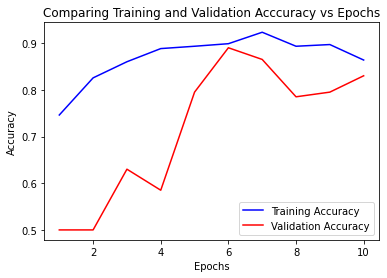

In [32]:
# extracting the model accuracy against epochs
ta = history.history['acc']
va = history.history['val_acc']
epochs = range(1,11)

# plotting the accuracies
plt.figure()
plt.plot(epochs, ta, 'b', label='Training Accuracy')
plt.plot(epochs, va, 'r', label='Validation Accuracy')
plt.title('Comparing Training and Validation Acccuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

As we can see, the training accuracy increases slightly, however, the validation accuracy increases drastically, thereby reducing the difference between the two as the number of epochs increase.

Next, we compare the training and validation losses. To do this, we use the history attribute and extract the losses of the models. Next, we plot it against the number of epochs using functions from the MatPlotLib library.

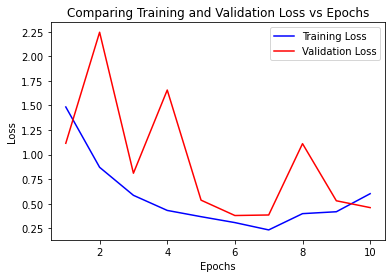

In [33]:
# extracting the model loss against epochs
tl = history.history['loss']
vl = history.history['val_loss']
epochs = range(1,11)

# plotting the losses
plt.figure()
plt.plot(epochs, tl, 'b', label='Training Loss')
plt.plot(epochs, vl, 'r', label='Validation Loss')
plt.title('Comparing Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

As we can see, both the training and validation loss decrease over time, however, the validation loss fluctuates a lot.

To evaluate the performance of the model on the test set, we use the evaluate() function and print the model's accuracy on the testing set.

In [34]:
# evaluating the model on the testing set
print(str.format('Accuracy on Test Set: {:.2f}%', model.evaluate(test_generator)[1]*100))

13/13 [==============================] - 1s 52ms/step - loss: 0.6587 - acc: 0.8192
Accuracy on Test Set: 81.92%


As we can see, the network has an accuracy of 81.92% on the test set, which means that the model performs well.